# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load in and Initial Overview of the provided training data

In [2]:
DATA_FOLDER_PATH = "./data/"
PATH_TO_TRAINING_DATA = DATA_FOLDER_PATH + "data_daily.csv"

In [3]:
provided_data_df = pd.read_csv(PATH_TO_TRAINING_DATA)

In [4]:
# Change the "# Date" column to be a datetime object
provided_data_df["# Date"] = pd.to_datetime(provided_data_df["# Date"])

In [5]:
provided_data_df.sample(10)

,# Date,Receipt_Count
200,2021-07-20,8987305
254,2021-09-12,9264013
253,2021-09-11,9508131
360,2021-12-27,10350408
139,2021-05-20,8471826
89,2021-03-31,8013013
72,2021-03-14,8070687
113,2021-04-24,8221890
279,2021-10-07,9363588
153,2021-06-03,8319351


In [6]:
provided_data_df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [7]:
provided_data_df.tail()

,# Date,Receipt_Count
360,2021-12-27,10350408
361,2021-12-28,10219445
362,2021-12-29,10313337
363,2021-12-30,10310644
364,2021-12-31,10211187


### What is the data type of each column?

In [8]:
for column in provided_data_df.columns:
    print(f"Column Name: {column:20} | Type: {provided_data_df[column].dtype}")

Column Name: # Date               | Type: datetime64[ns]
Column Name: Receipt_Count        | Type: int64


### How many rows of data is there?

In [9]:
provided_data_df.shape

(365, 2)

### Thoughts so far
Okay, so there's 365 days of data. I can now be sure if every day of the year is in the data. Then, I can ensure that there's no null values for Receipt_Count

In [10]:
print("Are all the day of the year present?")
len(provided_data_df["# Date"].unique()) == 365

Are all the day of the year present?


True

In [11]:
print("Are there any empty values for the Receipt_Count column?")
provided_data_df["Receipt_Count"].dropna().shape[0] != 365

Are there any empty values for the Receipt_Count column?


False

### Good
There's no gaps in this data. I'll now visualize the provided data as it is. Then, we can consider what dimensions we might want to add to this data.

# Initial Data Visualization

<AxesSubplot: xlabel='# Date'>

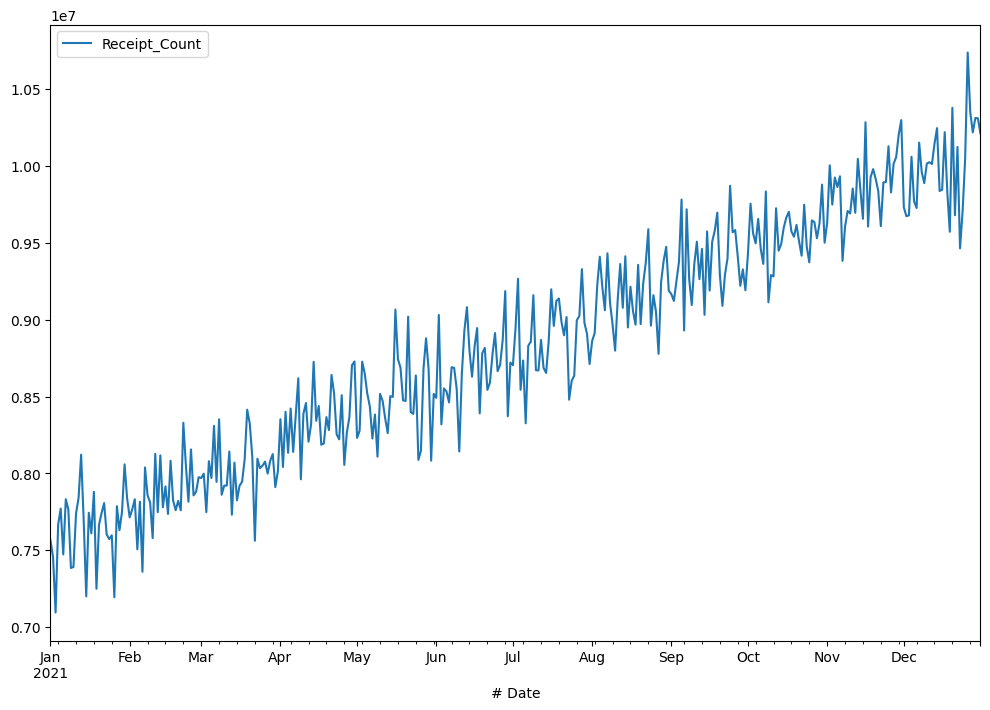

In [12]:
provided_data_df.plot("# Date", "Receipt_Count", figsize=(12,8))

### A quarterly moving-average view of the data

In [ ]:
moving_average_data_df = provided_data_df.copy()
moving_average_data_df["Weekly_Rolling"] = provided_data_df["Receipt_Count"].rolling(90).mean()

plt.plot(moving_average_data_df['Receipt_Count'], label='Raw Data',color="orange")
plt.plot(moving_average_data_df["Weekly_Rolling"], label='Rolling Mean',color="b")
plt.legend()
plt.ylabel('Receipt Count')
plt.xlabel('Time')
plt.show()

# Curiosities

- What's the Month-over-Month growth?
- Weekly statistics?
- Day of the Month?

### Looking at the total distribution of the data

In [ ]:
n, bins, patches = plt.hist(provided_data_df["Receipt_Count"], 30, facecolor='blue', alpha=0.5)

### Starting by expanding the datetime column into more columns. This can help in some cases below.

In [13]:
provided_data_expanded_df = provided_data_df.copy()
# provided_data_expanded_df.head()

In [14]:
provided_data_expanded_df.index.dtype

dtype('int64')

In [15]:
provided_data_expanded_df['day'] = provided_data_expanded_df["# Date"].dt.day
provided_data_expanded_df['weekday'] = provided_data_expanded_df["# Date"].dt.weekday
provided_data_expanded_df['month'] = provided_data_expanded_df["# Date"].dt.month
provided_data_expanded_df['year'] = provided_data_expanded_df["# Date"].dt.year
provided_data_expanded_df['week'] =provided_data_expanded_df["# Date"].dt.isocalendar().week

In [16]:
provided_data_expanded_df.head()

,# Date,Receipt_Count,day,weekday,month,year,week
0,2021-01-01,7564766,1,4,1,2021,53
1,2021-01-02,7455524,2,5,1,2021,53
2,2021-01-03,7095414,3,6,1,2021,53
3,2021-01-04,7666163,4,0,1,2021,1
4,2021-01-05,7771289,5,1,1,2021,1


In [17]:
provided_data_expanded_df.to_csv(DATA_FOLDER_PATH+"expanded_provided_data.csv",index=False)

In this case, the "weekday" column is Monday=0 and Sunday=6

## A look at the Receipt_Count statistics per weekday

In [18]:
description_of_weeday_receipts = provided_data_expanded_df.groupby("weekday")["Receipt_Count"].describe()

In [19]:
WEEKDAY_NAMES = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
description_of_weeday_receipts.rename(index={index:weekday for index,weekday in enumerate(WEEKDAY_NAMES)},inplace=True)


<AxesSubplot: xlabel='Weekday', ylabel='Mean (Receipt_Count)'>

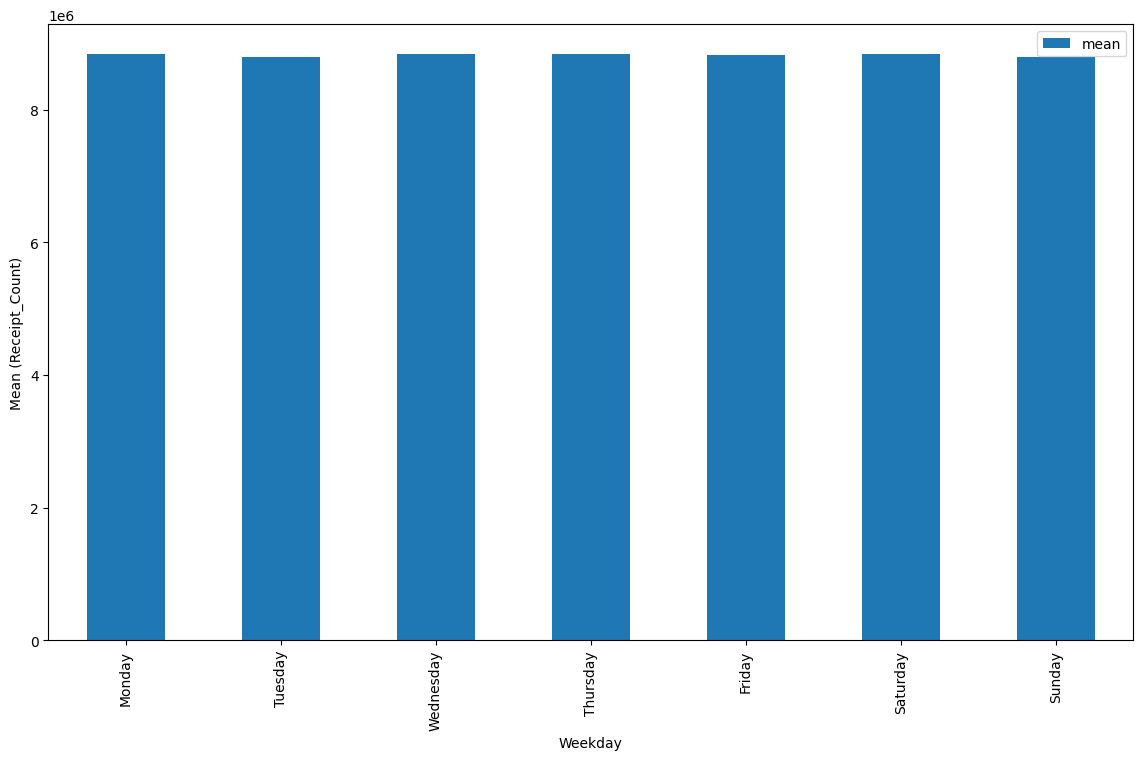

In [20]:
description_of_weeday_receipts.plot(y="mean",figsize=(14,8),xlabel="Weekday",ylabel="Mean (Receipt_Count)",kind="bar")

### Thoughts on weekday view
There seems to be no noticable trends in day of the week. I do notice that Monday is the largest usage date on average, but this likely won't be useful for Machine Learning.

## A look at the Receipt_Count statistics per Month

In [21]:
description_of_monthly_receipts = provided_data_expanded_df.groupby("month")["Receipt_Count"].describe()
description_of_monthly_receipts

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,31.0,7.636667e+06,241929.292194,7095414.0,7519043.00,7666397.0,7779199.00,8122546.0
2,28.0,7.858338e+06,204589.470400,7360372.0,7761041.75,7822971.0,7991815.25,8330147.0
3,31.0,8.019633e+06,181695.992632,7562433.0,7920979.00,8013013.0,8093541.50,8415152.0
4,30.0,8.354828e+06,202136.416078,7961949.0,8210520.00,8359936.0,8453438.50,8728816.0
5,31.0,8.488766e+06,253005.661988,8083372.0,8319057.00,8475700.0,8665105.50,9066670.0
6,30.0,8.688561e+06,235110.577830,8143101.0,8545378.75,8689331.5,8824793.00,9186579.0
7,31.0,8.863742e+06,238672.466748,8326629.0,8679172.50,8869283.0,9007365.50,9329236.0
8,31.0,9.159459e+06,211609.659657,8778271.0,8971331.00,9160096.0,9360275.00,9589375.0
9,30.0,9.371538e+06,232713.007998,8930331.0,9199415.25,9346401.5,9553935.75,9871832.0


In [22]:
MONTH_NAMES = ["January","February","March","April","May","June","July","August","September","October","November","December"]
description_of_monthly_receipts.rename(index={index+1:month for index,month in enumerate(MONTH_NAMES)},inplace=True)


<AxesSubplot: xlabel='Month', ylabel='Mean (Receipt_Count)'>

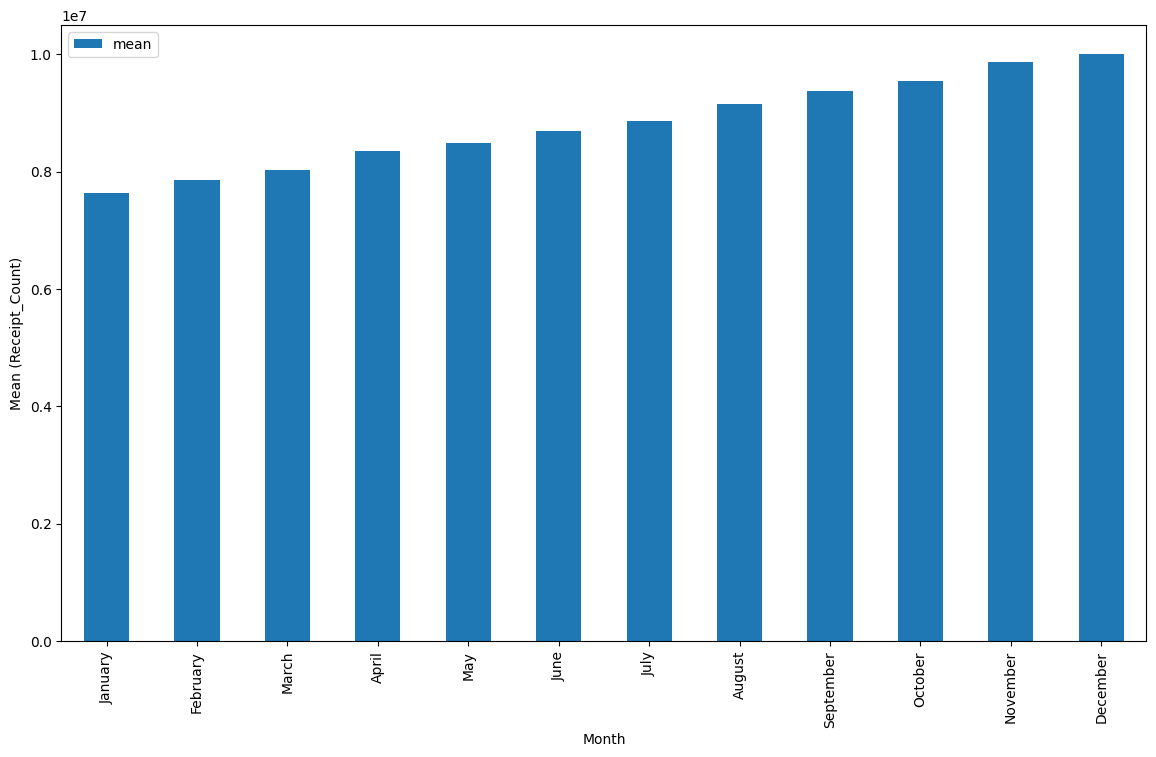

In [23]:
description_of_monthly_receipts.plot(y="mean",figsize=(14,8),xlabel="Month",ylabel="Mean (Receipt_Count)",kind="bar")

## Now, let's look over the month-over-month changes

In [24]:
month_over_month_difference = description_of_monthly_receipts.diff()
month_over_month_difference

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,-3.0,221670.534562,-37339.821794,264958.0,241998.75,156574.0,212616.25,207601.0
March,3.0,161295.207373,-22893.477768,202061.0,159937.25,190042.0,101726.25,85005.0
April,-1.0,335194.602151,20440.423446,399516.0,289541.00,346923.0,359897.00,313664.0
May,1.0,133938.397849,50869.245910,121423.0,108537.00,115764.0,211667.00,337854.0
June,-1.0,199795.268817,-17895.084158,59729.0,226321.75,213631.5,159687.50,119909.0
July,1.0,175180.698925,3561.888918,183528.0,133793.75,179951.5,182572.50,142657.0
August,0.0,295717.032258,-27062.807091,451642.0,292158.50,290813.0,352909.50,260139.0
September,-1.0,212079.402151,21103.348341,152060.0,228084.25,186305.5,193660.75,282457.0


### Viewing the monthly distribution

In [ ]:
for month_index, month in enumerate(MONTH_NAMES):
    monthly_split_mask = provided_data_expanded_df["month"] == month_index+1
    fig, ax = plt.subplots()
    ax.hist(provided_data_expanded_df.loc[monthly_split_mask]["Receipt_Count"], 10, facecolor='blue', alpha=0.5)
    ax.set_title(month)

<AxesSubplot: xlabel='Month', ylabel='Mean (Receipt_Count)'>

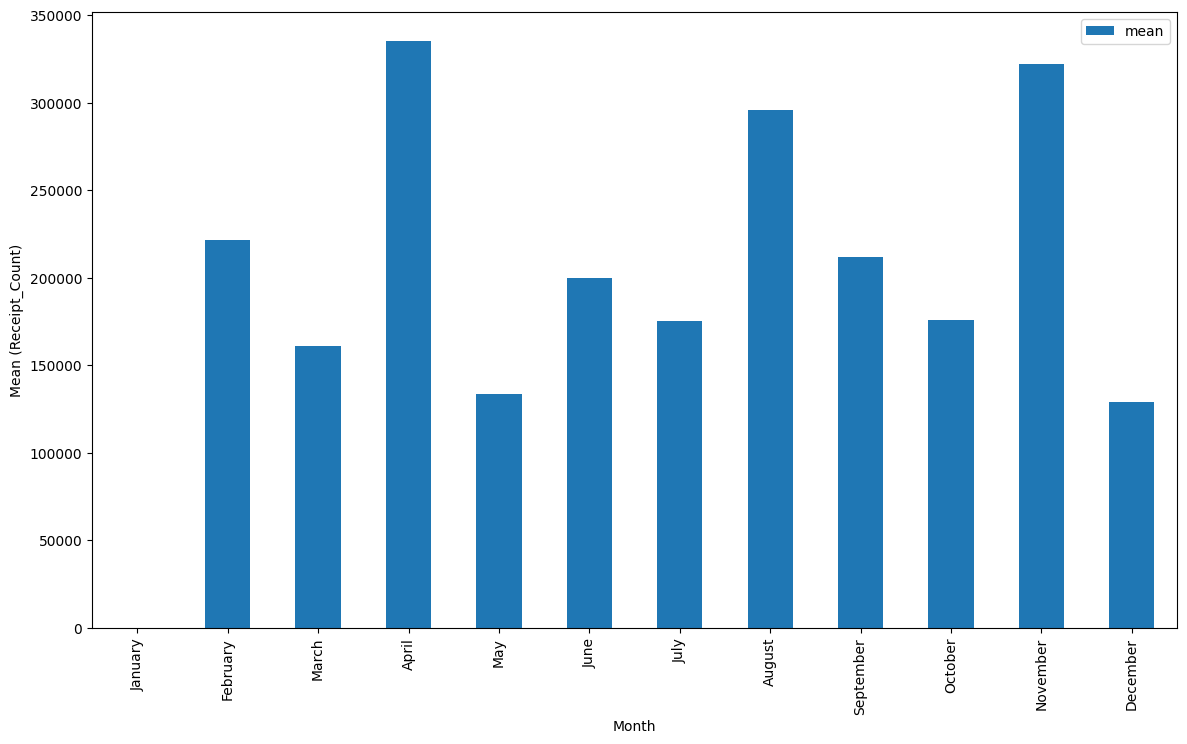

In [25]:
month_over_month_difference.plot(y="mean",figsize=(14,8),xlabel="Month",ylabel="Mean (Receipt_Count)",kind="bar")

In [26]:
month_over_month_statistics = month_over_month_difference.describe()
month_over_month_statistics

,count,mean,std,min,25%,50%,75%,max
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.000000,214697.938416,3900.748907,215385.909091,202956.727273,213613.363636,221465.181818,237847.181818
std,1.612452,72631.136893,42134.172796,123388.276409,77939.971767,77880.328695,93910.078304,138700.787481
min,-3.000000,128839.245161,-65311.196879,59729.000000,52665.500000,115764.000000,97700.750000,7530.000000
25%,-1.000000,168237.953149,-24978.142429,136741.500000,146865.500000,168262.750000,171130.000000,131283.000000
50%,0.000000,199795.268817,3561.888918,183528.000000,228084.250000,190042.000000,211667.000000,260139.000000
75%,1.000000,258693.783410,33540.750061,267092.000000,249743.125000,252222.250000,281839.750000,325759.000000
max,3.000000,335194.602151,71457.567273,451642.000000,292158.500000,346923.000000,359897.000000,439648.000000


### Thoughts on Month-Over-Month view

There's a 3900 standard deviation in month-over-month growth. Compared to the average month-over-month growth of 214K, this is about 2% in variability. There doesn't seem to be a strong trend in month's affect on the Receipt_Count variable.

# Feature Importance

In this section, I'll look at the correlation and Principle Component Analysis between variables to decide which ones have an affect on the Target (Receipt_Count)

## Correlation Matrix

In [27]:
# provided_data_expanded_df = provided_data_expanded_df.reset_index()

In [46]:
data_for_correlation = provided_data_expanded_df.copy()
data_for_correlation = data_for_correlation.drop(columns=["year"])

In [47]:
data_for_correlation["timestamp"] = pd.to_datetime(data_for_correlation['# Date']).astype(int)/ 10**9
data_for_correlation

,# Date,Receipt_Count,day,weekday,month,week,timestamp
0,2021-01-01,7564766,1,4,1,53,1.609459e+09
1,2021-01-02,7455524,2,5,1,53,1.609546e+09
2,2021-01-03,7095414,3,6,1,53,1.609632e+09
3,2021-01-04,7666163,4,0,1,1,1.609718e+09
4,2021-01-05,7771289,5,1,1,1,1.609805e+09
...,...,...,...,...,...,...,...
360,2021-12-27,10350408,27,0,12,52,1.640563e+09
361,2021-12-28,10219445,28,1,12,52,1.640650e+09
362,2021-12-29,10313337,29,2,12,52,1.640736e+09
363,2021-12-30,10310644,30,3,12,52,1.640822e+09


In [48]:
feature_correlation_matrix = data_for_correlation.corr()
feature_correlation_matrix

/var/folders/k2/rshxrq014ylghy11g120k3vh0000gn/T/ipykernel_31336/438574256.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_correlation_matrix = data_for_correlation.corr()


,Receipt_Count,day,weekday,month,week,timestamp
Receipt_Count,1.000000,0.084250,-0.005646,0.957785,0.906329,0.960658
day,0.084250,1.000000,0.016256,0.011893,0.049652,0.095131
weekday,-0.005646,0.016256,1.000000,-0.008561,0.002861,-0.007106
month,0.957785,0.011893,-0.008561,1.000000,0.949729,0.996504
week,0.906329,0.049652,0.002861,0.949729,1.000000,0.949867
timestamp,0.960658,0.095131,-0.007106,0.996504,0.949867,1.000000


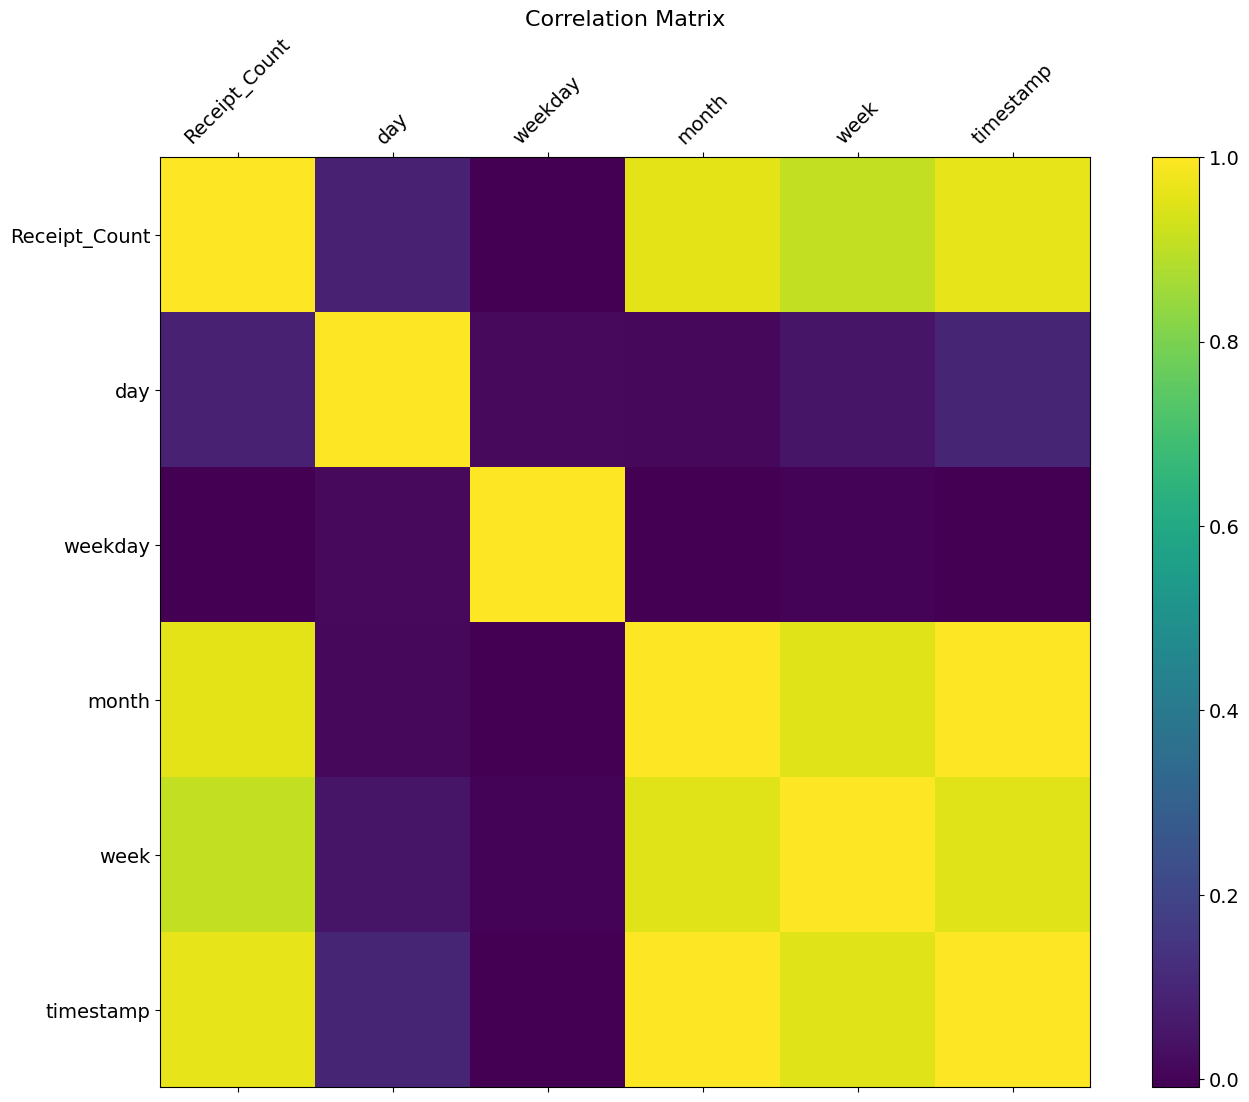

In [49]:
f = plt.figure(figsize=(16, 12))
plt.matshow(feature_correlation_matrix, fignum=f.number)
plt.xticks(range(data_for_correlation.select_dtypes(['number']).shape[1]), data_for_correlation.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data_for_correlation.select_dtypes(['number']).shape[1]), data_for_correlation.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Thoughts on Feature Correlation

Here, I see that the unix timestamp (or "# Date") column has the most correlation to the Target ("Receipt_Count"). The other columns are derivatives of "# Date", so they do give some correlation to "Receipt_Count", but not as much as the timestamp.

## Principle Component Analysis (PCA)

In [50]:
data_for_pca =  data_for_correlation.copy()
data_for_pca = data_for_pca.drop(columns=["# Date"])
data_for_pca.dropna()

,Receipt_Count,day,weekday,month,week,timestamp
0,7564766,1,4,1,53,1.609459e+09
1,7455524,2,5,1,53,1.609546e+09
2,7095414,3,6,1,53,1.609632e+09
3,7666163,4,0,1,1,1.609718e+09
4,7771289,5,1,1,1,1.609805e+09
...,...,...,...,...,...,...
360,10350408,27,0,12,52,1.640563e+09
361,10219445,28,1,12,52,1.640650e+09
362,10313337,29,2,12,52,1.640736e+09
363,10310644,30,3,12,52,1.640822e+09


In [51]:
! pip install scikit-learn
from sklearn.decomposition import PCA

In [52]:
X_scaled = (data_for_pca - data_for_pca.mean(axis=0)) / data_for_pca.std(axis=0)
X_scaled

,Receipt_Count,day,weekday,month,week,timestamp
0,-1.613537,-1.671209,0.498459,-1.600548,1.751915,-1.724944
1,-1.753231,-1.557680,0.998288,-1.600548,1.751915,-1.715466
2,-2.213724,-1.444151,1.498117,-1.600548,1.751915,-1.705989
3,-1.483874,-1.330622,-1.500856,-1.600548,-1.695964,-1.696511
4,-1.349444,-1.217093,-1.001027,-1.600548,-1.695964,-1.687033
...,...,...,...,...,...,...
360,1.948625,1.280545,-1.500856,1.585471,1.685609,1.687033
361,1.781155,1.394074,-1.001027,1.585471,1.685609,1.696511
362,1.901220,1.507603,-0.501198,1.585471,1.685609,1.705989
363,1.897776,1.621132,-0.001369,1.585471,1.685609,1.715466


In [53]:
# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.688801,-0.774152,-1.537876,2.536933,1.413803,-0.000874
1,-1.749917,-0.338036,-1.806786,2.623678,1.321328,-0.000661
2,-1.969880,0.096839,-2.077117,2.913721,1.038206,-0.000011
3,-3.287101,-1.913106,0.205333,-0.169891,0.071696,0.005547
4,-3.212482,-1.475928,-0.062363,-0.256864,0.142129,0.005387


In [54]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=data_for_pca.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Receipt_Count,0.495160,0.003871,0.004428,-0.633721,0.594287,-0.001362
day,0.041956,0.696902,0.712844,0.024455,-0.018866,-0.058883
weekday,-0.003008,0.715173,-0.698875,-0.007929,-0.005400,-0.000024
month,0.504699,-0.050430,-0.049202,-0.066192,-0.492014,-0.702749
week,0.492243,-0.015320,-0.029666,0.767733,0.408856,-0.001870
timestamp,0.505987,0.007883,0.010341,-0.062771,-0.487028,0.708993


In [55]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

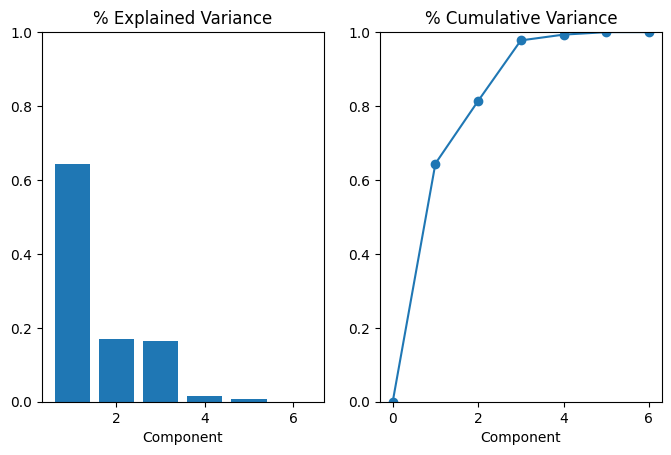

In [56]:
# Look at explained variance
plot_variance(pca);

### Thoughts on Principle Component Analysis (PCA)

In PCA, I can see that the first 3 Principle Components have a significant relationship with "Receipt_Count"

# Conclusion
From my exploratory analysis, I see the data came in quite clean and standardized.

After analyzing the relationships between the expanded features and the target, I believe the answer to this problem is a regression algorithm. The input could be as simple as inputting "# Date" as a unix timestamp and outputting the prediction for "Receipt_Count".

The reason I don't believe in adding more data to this model, is because there was no observed trends or seasonality in the dataset. Day of week, months, and weeks didn't show a pattern that can be extrapolated or interpolated over time. It seems more like a linear growth in the app. This could be discovered with more data, such as number of users using the app, users average app usage, and more from the Business Intelligence team.

# Next Steps

This assignment states not to use scikit-learn's models, so I will create my own regression model using PyTorch or Tensorflow. I'll use various loss/objective functions to see how well the model can fit with the data. 

In terms of training and validation data, I will use the beginning and end of the data's daterange as validation data. This outside range will more closely simulate a test dataset, where the model might be tested on the dataset before or after the training data. For example, the test set might be 2020, or even 2023 for use in production! 

# Further Explorations

The idea of how do Holiday's affect the Number of Receipts registered in the Fetch App would be an idea to explore if I had more time.

## A look into Holiday's Overlayed on the data

Here's a Kaggle Dataset I found with a list of U.S. Holiday's. I chose U.S. to start as I know Fetch is U.S. based, and I believe this is a quick way to sample for this hypothesis.

https://www.kaggle.com/datasets/donnetew/us-holiday-dates-2004-2021

CSV is downloadable here

https://github.com/drewrya/DS4A---Team-16/blob/main/US%20Holiday%20Dates%20(2004-2021).csv

In [39]:
US_HOLIDAYS = pd.read_csv(DATA_FOLDER_PATH+"US_Holiday_Dates.csv")
US_HOLIDAYS = US_HOLIDAYS.rename(columns={"Month":"month","Day":"day"})

In [40]:
US_HOLIDAYS.head()

,Date,Holiday,WeekDay,month,day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [41]:
provided_data_with_holidays = provided_data_expanded_df.copy()

In [42]:
for row_1 in provided_data_with_holidays.itertuples():
    month = row_1.month
    day = row_1.day
#     month_day_holiday_match_mask = US_HOLIDAYS[]
#     if US_HOLIDAYS.loc[US_HOLIDAYS]